In [1]:
# import required packages
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [2]:
from numpy import *

In [3]:
cancer = pd.read_csv("cancer.csv")
interior = pd.read_csv("Interior.csv", index_col= 0)
census = pd.read_csv('census.csv')

In [4]:
interior.head()

room_type  room_size  num_windows  ceiling_height  wall_color  \
room_id                                                                    
1        Living Room        250            4               9       Beige   
2            Bedroom        180            2               8  Light Blue   
3            Kitchen        300            3              10       White   
4        Dining Room        150            2               9        Gray   
5        Home Office        120            1               8        Navy   

        flooring_type furniture_style  lighting_quality  decor_budget  \
room_id                                                                 
1            Hardwood          Modern                 4          5000   
2              Carpet     Traditional                 3          3000   
3                Tile    Contemporary                 5          7500   
4            Hardwood          Rustic                 4          4000   
5            Laminate      Industrial                 3          2500   

         overall_design_score  
room_id                        
1                         4.2  
2                         3.8  
3                         4.5  
4                         4.1  
5                         3.6

In [5]:
interior.shape

(50, 10)

In [6]:
interior.dtypes

room_type                object
room_size                 int64
num_windows               int64
ceiling_height            int64
wall_color               object
flooring_type            object
furniture_style          object
lighting_quality          int64
decor_budget              int64
overall_design_score    float64
dtype: object

In [7]:
interior.room_type.unique()

array(['Living Room', 'Bedroom', 'Kitchen', 'Dining Room', 'Home Office',
       'Bathroom'], dtype=object)

In [8]:
interior.groupby('room_type')['decor_budget'].agg(['min','max'])

min    max
room_type               
Bathroom     2500   3300
Bedroom      3000   4500
Dining Room  4000   5000
Home Office  2000   3100
Kitchen      6500   8000
Living Room  5000  10000

In [9]:
interior.groupby('room_type')['decor_budget'].mean()

room_type
Bathroom       3012.50
Bedroom        3856.25
Dining Room    4606.25
Home Office    2756.25
Kitchen        7343.75
Living Room    7600.00
Name: decor_budget, dtype: float64

In [10]:
interior.groupby('room_type')['num_windows'].mean().round()

room_type
Bathroom       1.0
Bedroom        2.0
Dining Room    2.0
Home Office    1.0
Kitchen        4.0
Living Room    4.0
Name: num_windows, dtype: float64

In [11]:
interior.groupby('room_type')['overall_design_score'].mean()

room_type
Bathroom       3.9375
Bedroom        4.1125
Dining Room    4.2750
Home Office    3.7000
Kitchen        4.5750
Living Room    4.6800
Name: overall_design_score, dtype: float64

In [12]:
interior.groupby(['room_type','flooring_type'])['overall_design_score'].mean()

room_type    flooring_type
Bathroom     Tile             3.9375
Bedroom      Carpet           4.1125
Dining Room  Hardwood         4.2750
Home Office  Laminate         3.7000
Kitchen      Tile             4.5750
Living Room  Hardwood         4.6800
Name: overall_design_score, dtype: float64

In [13]:
interior['flooring_type'].unique()

array(['Hardwood', 'Carpet', 'Tile', 'Laminate'], dtype=object)

In [14]:
interior[(interior['flooring_type']== 'Hardwood') & (interior['room_type']== 'Living') ]

Empty DataFrame
Columns: [room_type, room_size, num_windows, ceiling_height, wall_color, flooring_type, furniture_style, lighting_quality, decor_budget, overall_design_score]
Index: []

In [15]:
room = interior[(interior['flooring_type']== 'Hardwood')][['room_type']]
room.room_type.unique()

array(['Living Room', 'Dining Room'], dtype=object)

In [16]:
interior1 = interior.select_dtypes(exclude='object')
interior1.corr()

room_size  num_windows  ceiling_height  \
room_size              1.000000     0.934071        0.859175   
num_windows            0.934071     1.000000        0.860772   
ceiling_height         0.859175     0.860772        1.000000   
lighting_quality       0.800526     0.809745        0.816000   
decor_budget           0.929001     0.907738        0.908736   
overall_design_score   0.866166     0.874601        0.850185   

                      lighting_quality  decor_budget  overall_design_score  
room_size                     0.800526      0.929001              0.866166  
num_windows                   0.809745      0.907738              0.874601  
ceiling_height                0.816000      0.908736              0.850185  
lighting_quality              1.000000      0.871160              0.881386  
decor_budget                  0.871160      1.000000              0.938565  
overall_design_score          0.881386      0.938565              1.000000

<Axes: >

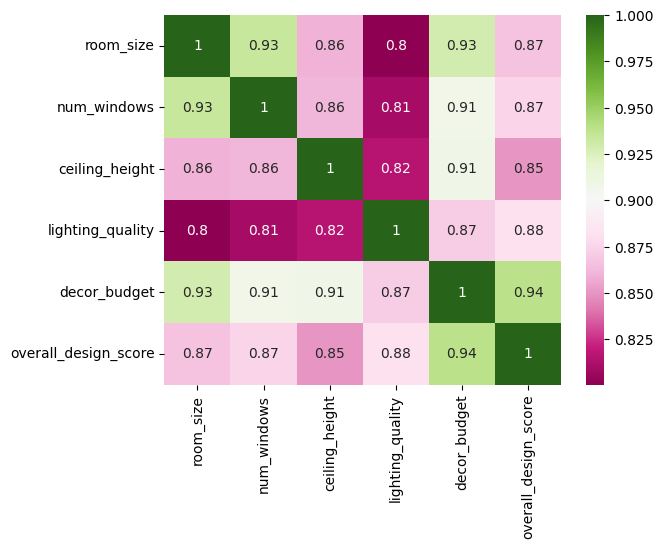

In [17]:
import seaborn as sns
sns.heatmap(interior1.corr(), annot= True, cmap='PiYG')

Text(0.5, 1.0, 'Feature Correlation Matrix')

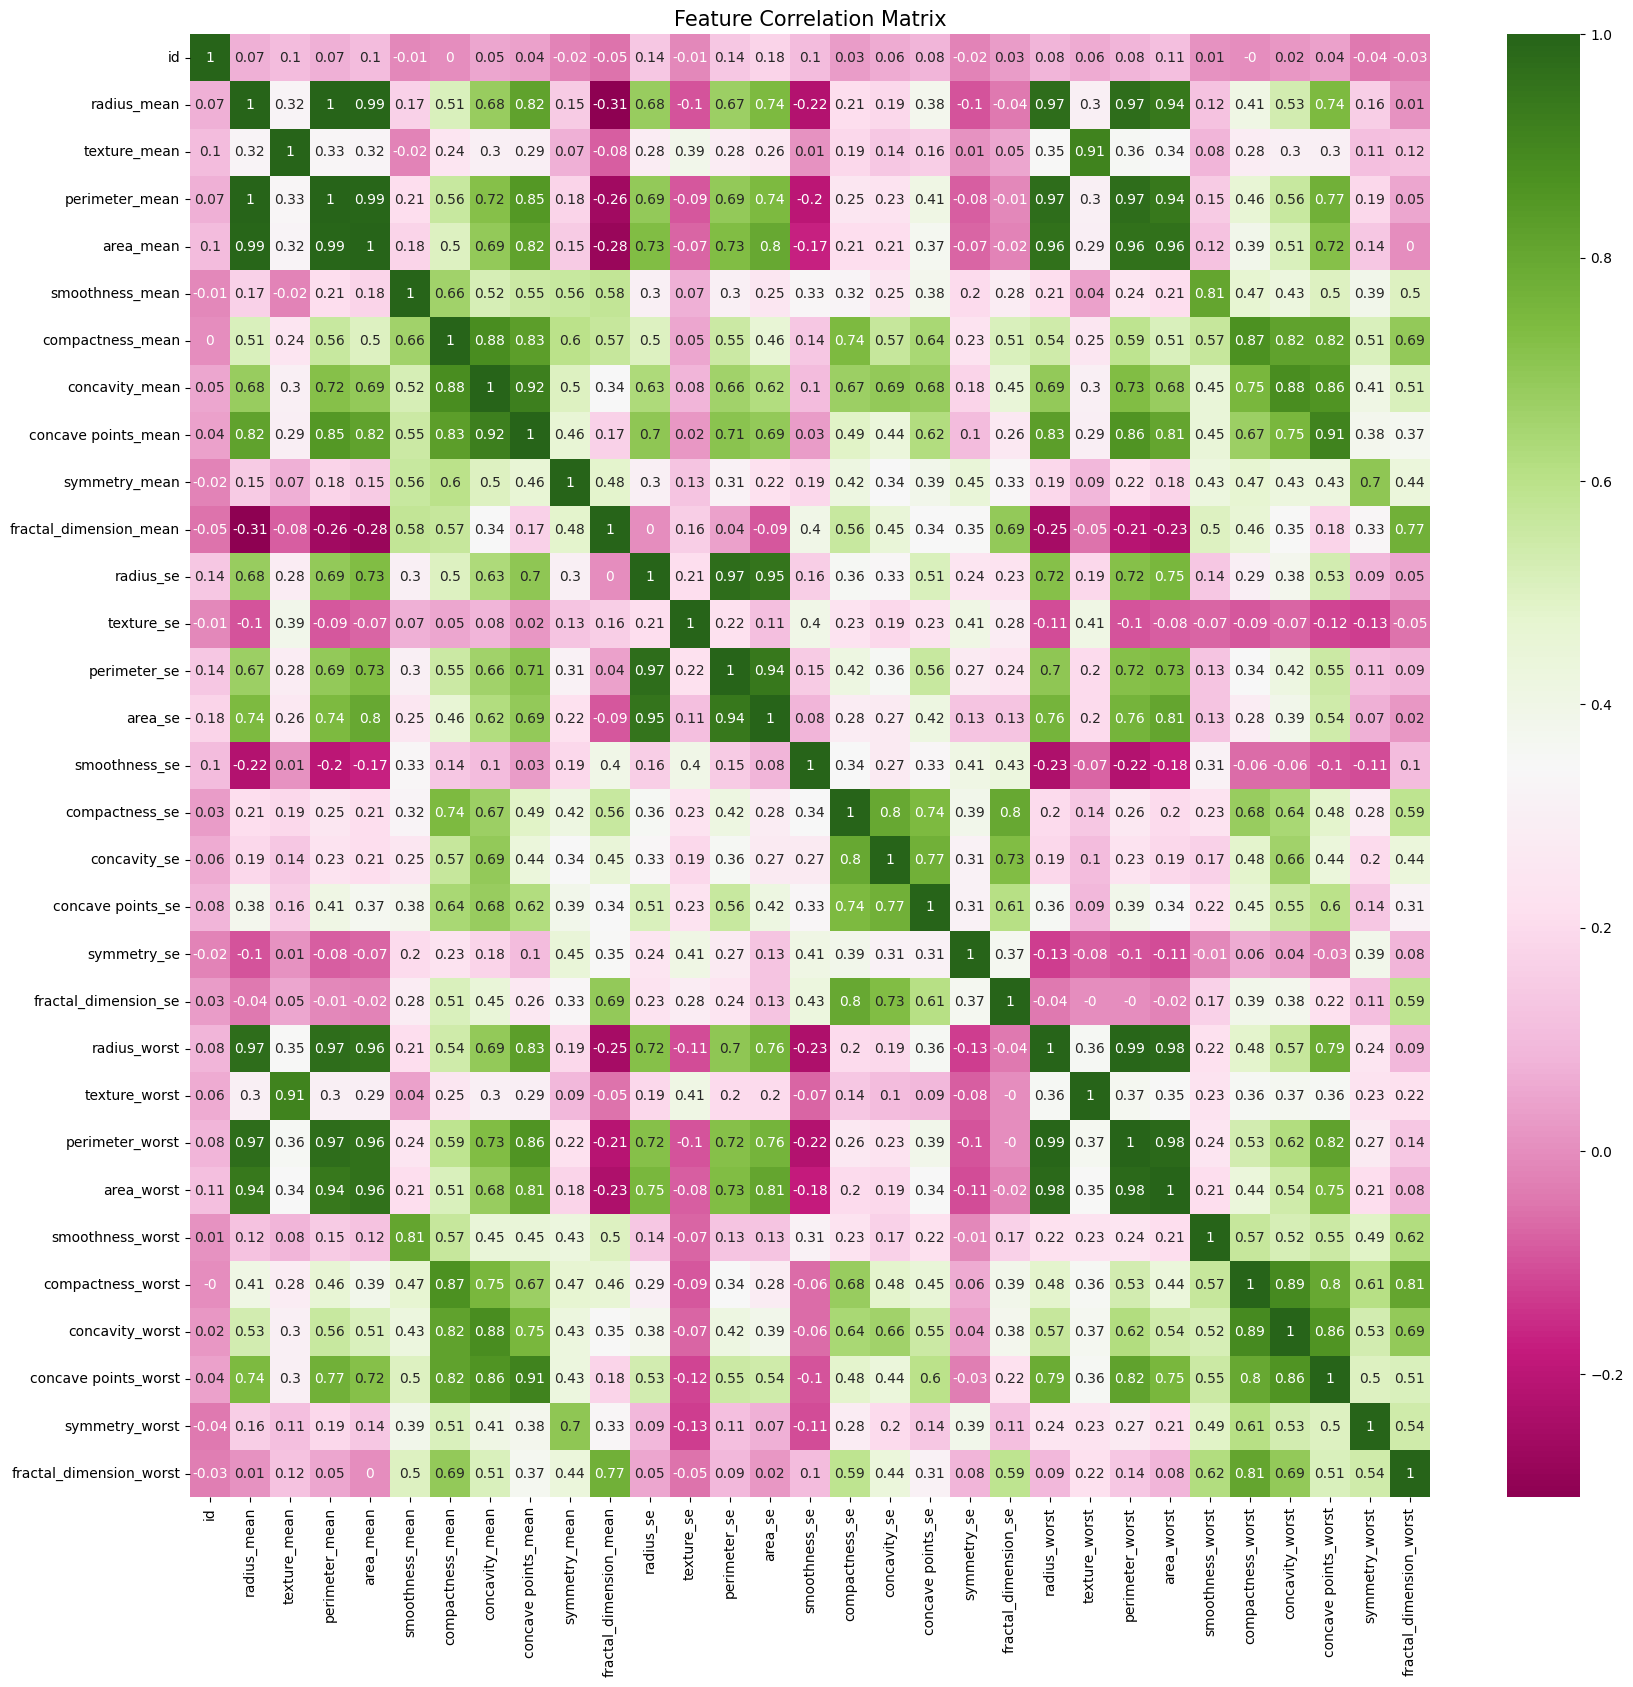

In [18]:
cancer_data = cancer.select_dtypes(exclude= [object])

plt.figure(figsize=(20,19)) 
sns.heatmap(cancer_data.corr().round(2), annot=True, cmap='PiYG') 
plt.title("Feature Correlation Matrix",fontsize=15) 

Text(0.5, 1.0, 'Feature Correlation Matrix')

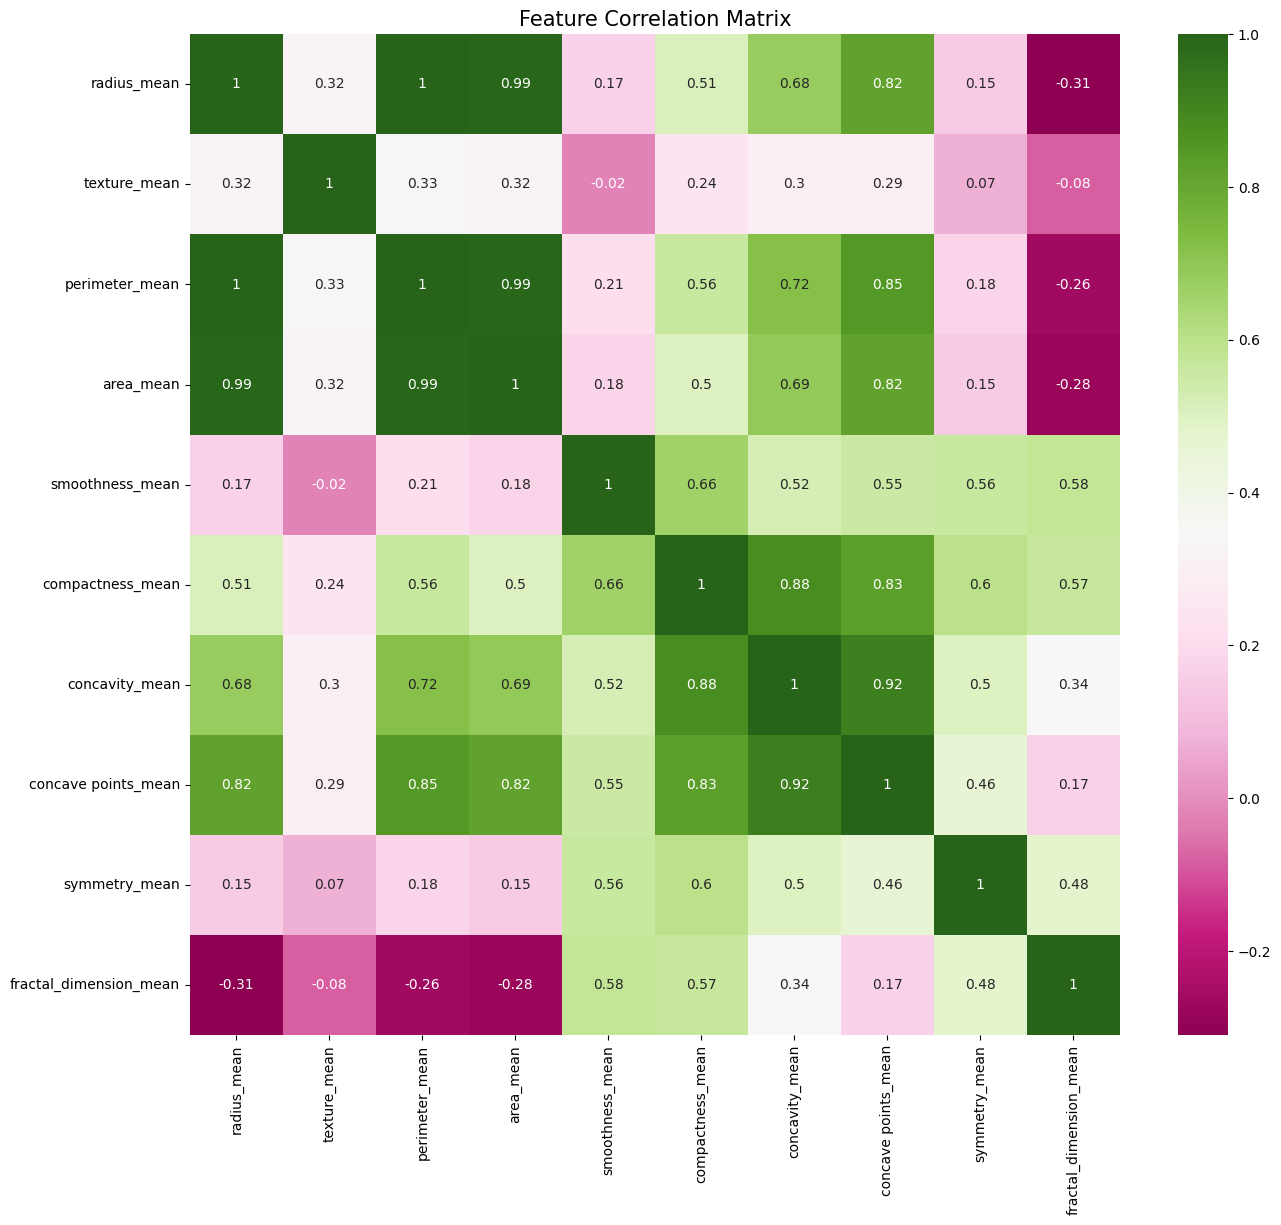

In [19]:
cancer2 = cancer.filter(like="_mean") #Subset all columns that ends with _mean
plt.figure(figsize=(15,13)) 
sns.heatmap(cancer2.corr().round(2), annot=True, cmap='PiYG') 
plt.title("Feature Correlation Matrix",fontsize=15) 

In [20]:
# pandas crosstab
pd.crosstab(index = interior['wall_color'], columns = interior['furniture_style'])

furniture_style  Contemporary  Industrial  Minimalist  Modern  Rustic  \
wall_color                                                              
Beige                       0           0           0       7       1   
Dark Blue                   0           0           0       0       1   
Dark Gray                   1           0           0       0       1   
Dark Green                  0           0           0       0       2   
Gray                        0           0           0       0       2   
Green                       0           1           0       0       0   
Light Blue                  0           0           1       1       0   
Light Brown                 1           0           0       0       0   
Light Gray                  2           0           0       1       0   
Light Green                 0           1           1       0       0   
Light Orange                0           0           2       0       0   
Light Pink                  0           0           2       0       0   
Light Purple                0           0           1       0       1   
Light Red                   0           0           0       0       0   
Light Teal                  0           2           0       0       0   
Light Yellow                0           0           0       1       0   
Navy                        0           2           0       0       0   
Peach                       0           0           1       0       0   
Soft Pink                   0           0           0       0       0   
Soft Yellow                 0           0           0       0       0   
Teal                        0           2           0       0       0   
White                       3           0           0       0       0   
Yellow                      1           0           0       0       0   

furniture_style  Traditional  
wall_color                    
Beige                      0  
Dark Blue                  0  
Dark Gray                  0  
Dark Green                 0  
Gray                       0  
Green                      0  
Light Blue                 1  
Light Brown                0  
Light Gray                 1  
Light Green                1  
Light Orange               0  
Light Pink                 0  
Light Purple               1  
Light Red                  1  
Light Teal                 0  
Light Yellow               1  
Navy                       0  
Peach                      0  
Soft Pink                  1  
Soft Yellow                1  
Teal                       0  
White                      0  
Yellow                     0

In [22]:
#pivot table
pd.pivot_table(interior1, index = interior['room_type'], aggfunc = 'mean').round(2)

ceiling_height  decor_budget  lighting_quality  num_windows  \
room_type                                                                  
Bathroom               8.00       3012.50              4.00         1.00   
Bedroom                8.25       3856.25              3.88         2.25   
Dining Room            9.00       4606.25              4.00         2.00   
Home Office            8.00       2756.25              3.00         1.00   
Kitchen               10.00       7343.75              5.00         3.50   
Living Room            9.50       7600.00              4.90         4.10   

             overall_design_score  room_size  
room_type                                     
Bathroom                     3.94      98.75  
Bedroom                      4.11     211.25  
Dining Room                  4.28     170.00  
Home Office                  3.70     135.00  
Kitchen                      4.58     308.75  
Living Room                  4.68     304.00

In [23]:
pd.pivot_table(interior1, index = (interior['room_type'],interior1['lighting_quality']), aggfunc = 'mean').round()

ceiling_height  decor_budget  num_windows  \
room_type   lighting_quality                                              
Bathroom    4                            8.0        3012.0          1.0   
Bedroom     3                            8.0        3000.0          2.0   
            4                            8.0        3979.0          2.0   
Dining Room 4                            9.0        4606.0          2.0   
Home Office 3                            8.0        2756.0          1.0   
Kitchen     5                           10.0        7344.0          4.0   
Living Room 4                            9.0        5000.0          4.0   
            5                           10.0        7889.0          4.0   

                              overall_design_score  room_size  
room_type   lighting_quality                                   
Bathroom    4                                  4.0       99.0  
Bedroom     3                                  4.0      180.0  
            4                                  4.0      216.0  
Dining Room 4                                  4.0      170.0  
Home Office 3                                  4.0      135.0  
Kitchen     5                                  5.0      309.0  
Living Room 4                                  4.0      250.0  
            5                                  5.0      310.0

In [73]:
decor_type = pd.pivot_table(interior1, 
               index = interior['room_type'],
               values = 'decor_budget',
               aggfunc = 'mean').round(2).sort_values('decor_budget', ascending = False).reset_index()

decor_type

room_type  decor_budget
0  Living Room       7600.00
1      Kitchen       7343.75
2  Dining Room       4606.25
3      Bedroom       3856.25
4     Bathroom       3012.50
5  Home Office       2756.25

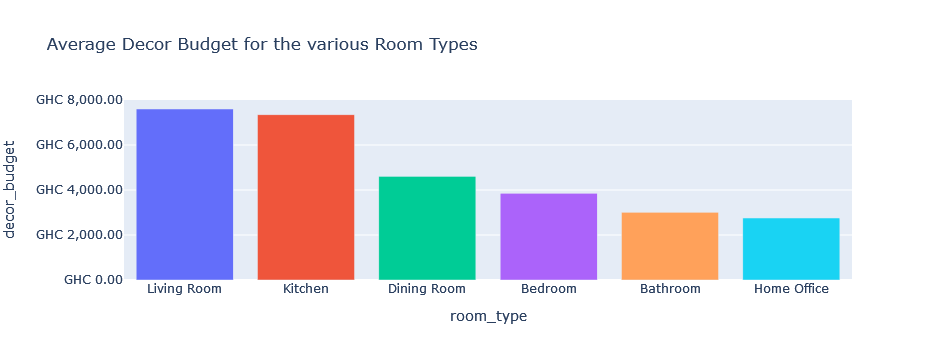

In [75]:
fig = px.bar(
    decor_type,
    x = 'room_type',
    y = 'decor_budget',
    color = 'room_type',
    title = 'Average Decor Budget for the various Room Types'
)
fig.update_layout(showlegend =  False,yaxis_tickprefix = 'GHC ', yaxis_tickformat= ',.2f')
fig.show()

In [76]:
over_room = interior.pivot_table(
    index='room_type',
    values='overall_design_score',
    aggfunc='mean'
).sort_values(by='overall_design_score',ascending=False).reset_index()
over_room

room_type  overall_design_score
0  Living Room                4.6800
1      Kitchen                4.5750
2  Dining Room                4.2750
3      Bedroom                4.1125
4     Bathroom                3.9375
5  Home Office                3.7000

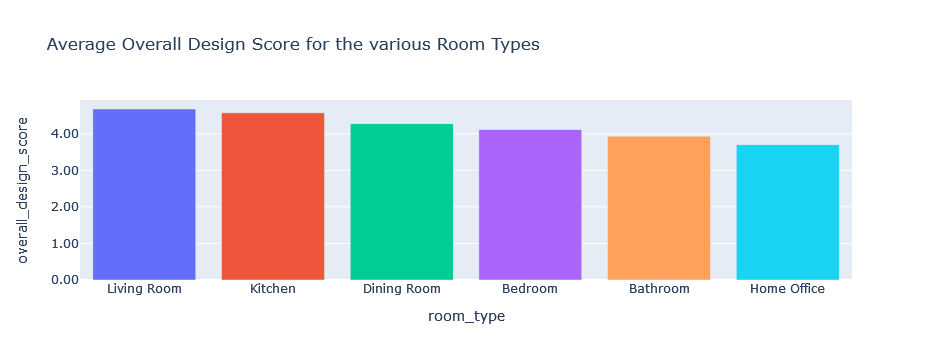

In [87]:
fig = px.bar(
    over_room,
    x='room_type',
    y='overall_design_score',
    color='room_type',
    title='Average Overall Design Score for the various Room Types'
)
fig.update_layout(showlegend =False,yaxis_tickformat=',.2f')
fig.show()

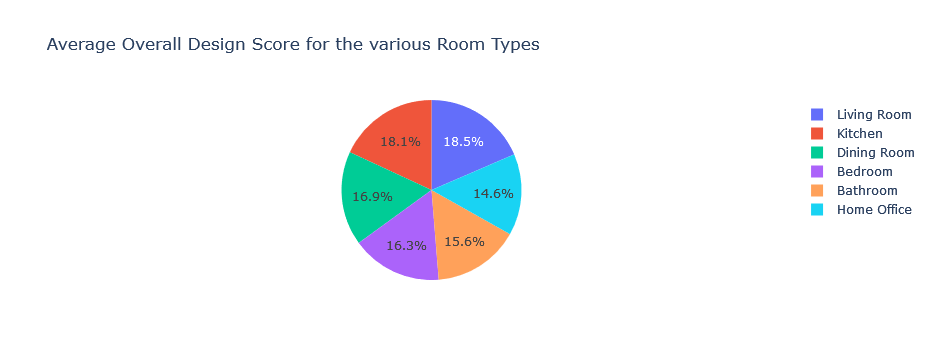

In [93]:
fig = px.pie(
    over_room,
    names='room_type',
    values ='overall_design_score',
    color='room_type',
    title='Average Overall Design Score for the various Room Types'
)
fig.update_layout(showlegend =True,yaxis_tickformat=',.2f')
fig.show()

In [83]:
can_data= cancer.pivot_table(
    index = 'diagnosis',
    values = 'radius_mean',
    aggfunc = 'mean'
).round(2).sort_values(by = 'radius_mean').reset_index()

In [84]:
can_data

diagnosis  radius_mean
0         B        12.15
1         M        17.46

In [97]:
census_state = census.pivot_table(
    index = 'STNAME',
    values = 'BIRTHS2015',
    aggfunc= 'max'
).sort_values(by = 'BIRTHS2015',ascending= False).reset_index

In [98]:
census_state.shape

(51, 2)

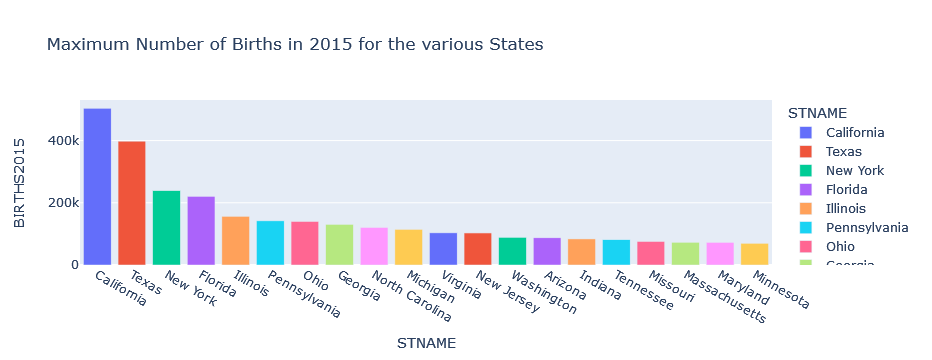

In [101]:
fig = px.bar(
    census_state.head(20),
    x = 'STNAME',
    y = 'BIRTHS2015',
    color = 'STNAME',
    title = 'Maximum Number of Births in 2015 for the various States'
)

fig.show()

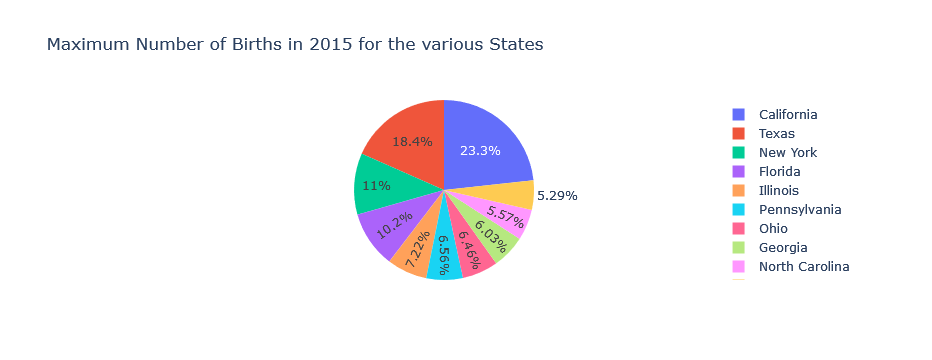

In [103]:
fig = px.pie(
    census_state.head(10),
    names = 'STNAME',
    values = 'BIRTHS2015',
    color = 'STNAME',
    title = 'Maximum Number of Births in 2015 for the various States'
)

fig.show()

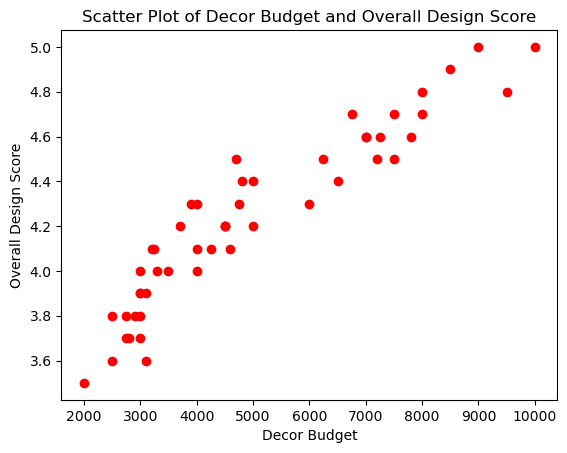

In [130]:
 #Scatterplot using matplotlib
plt.scatter(interior['decor_budget'],interior['overall_design_score'], c = 'red')
plt.title('Scatter Plot of Decor Budget and Overall Design Score')
plt.xlabel('Decor Budget')
plt.ylabel('Overall Design Score')
plt.show()

Text(0, 0.5, 'Decor Budget')

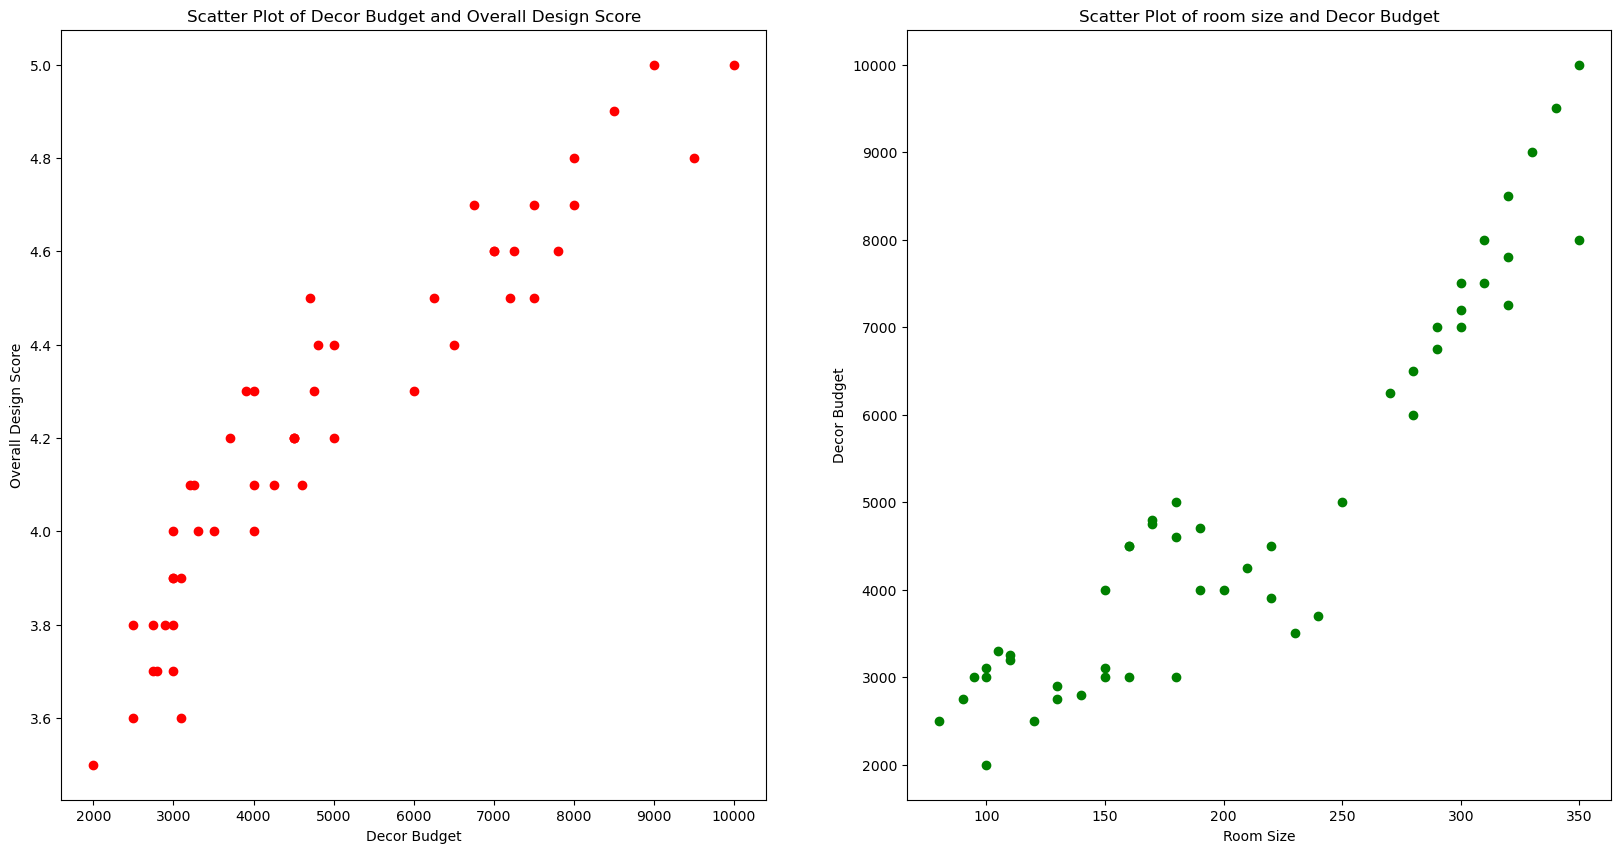

In [147]:
from pylab import *
fig = plt.figure(figsize=(20,10), dpi=100)
subplot(1,2,1)
plt.scatter(interior['decor_budget'],interior['overall_design_score'], c = 'red')
plt.title('Scatter Plot of Decor Budget and Overall Design Score')
plt.xlabel('Decor Budget')
plt.ylabel('Overall Design Score')

subplot(1,2,2)
plt.scatter(interior['room_size'],interior['decor_budget'], c = 'g')
plt.title('Scatter Plot of room size and Decor Budget')
plt.xlabel('Room Size')
plt.ylabel('Decor Budget')

#plot(y, x, 'g*-');

(array([1., 4., 9., 4., 2., 4., 6., 3., 0., 0., 2., 2., 2., 4., 1., 2., 1.,
        1., 1., 1.]),
 array([ 2000.,  2400.,  2800.,  3200.,  3600.,  4000.,  4400.,  4800.,
         5200.,  5600.,  6000.,  6400.,  6800.,  7200.,  7600.,  8000.,
         8400.,  8800.,  9200.,  9600., 10000.]),
 <BarContainer object of 20 artists>)

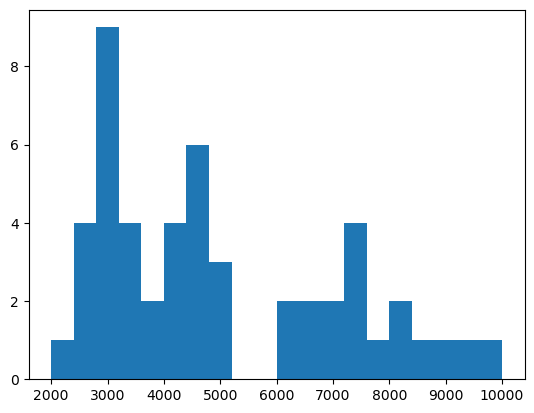

In [150]:
plt.hist(interior['decor_budget'],bins = 20)

In [149]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distributio

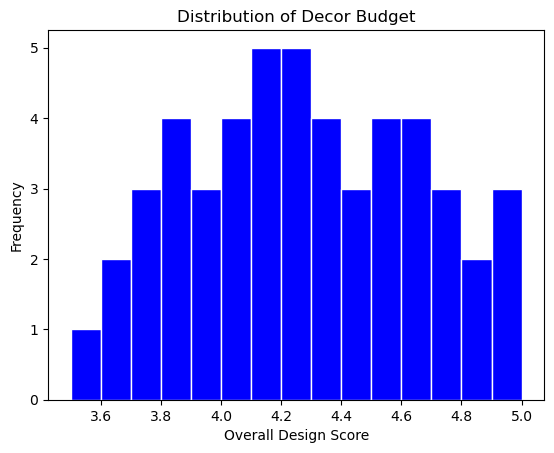

In [159]:
plt.hist(
    interior['overall_design_score'],
    color = 'blue',
    edgecolor = 'white',
    bins = 15
)
plt.title("Distribution of Decor Budget")
plt.xlabel('Overall Design Score')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='decor_budget', ylabel='overall_design_score'>

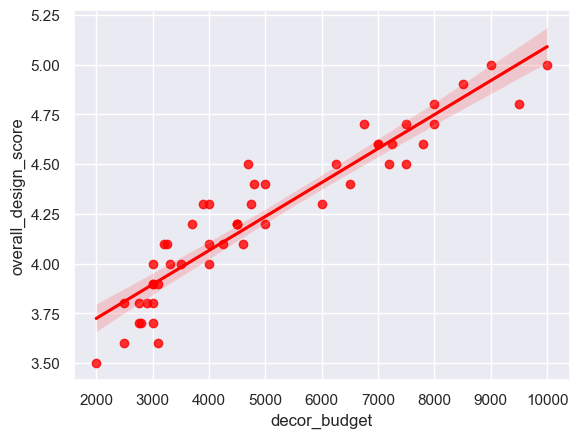

In [162]:
#Scatter plot using Seaborn
sns.set(style = 'darkgrid')
sns.regplot(x = interior['decor_budget'],y= interior['overall_design_score'], color = 'red' )

<Axes: xlabel='decor_budget', ylabel='overall_design_score'>

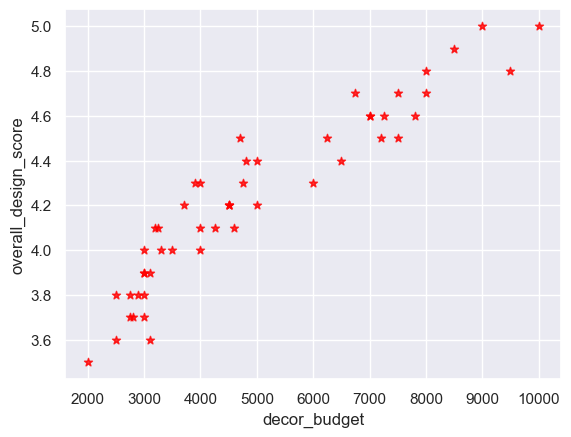

In [164]:
#Scatter plot using Seaborn
sns.set(style = 'darkgrid')
sns.regplot(x = interior['decor_budget'],
            y= interior['overall_design_score'], 
            color = 'red', fit_reg= False,
           marker= "*")

In [161]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is

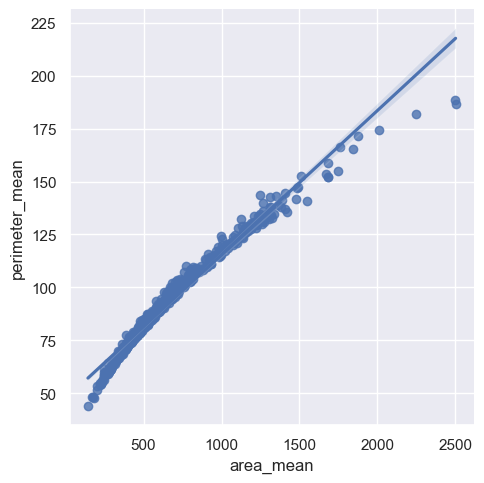

In [165]:
sns.lmplot(x='area_mean', y= 'perimeter_mean', data = cancer)

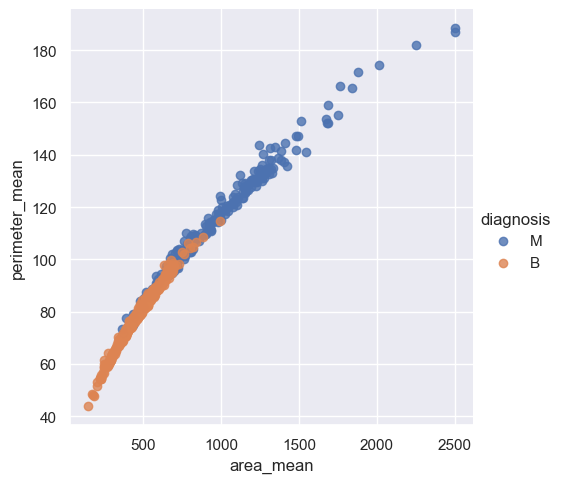

In [166]:
sns.lmplot(x='area_mean', y= 'perimeter_mean', data = cancer,
          fit_reg = False, hue = 'diagnosis',
           legend = True
          )

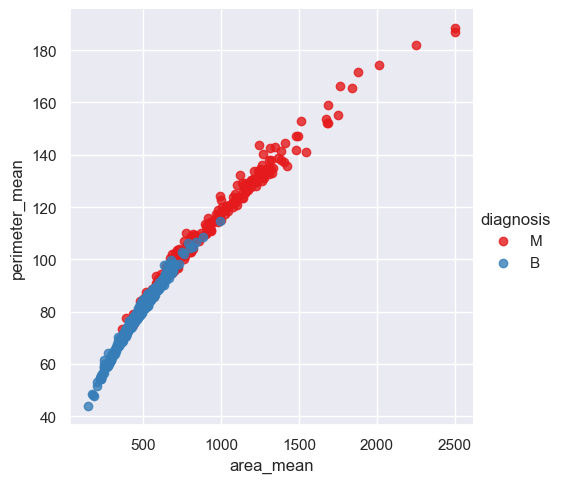

In [167]:
sns.lmplot(x='area_mean', y= 'perimeter_mean', data = cancer,
          fit_reg = False, hue = 'diagnosis',
           legend = True,palette= "Set1"
          )

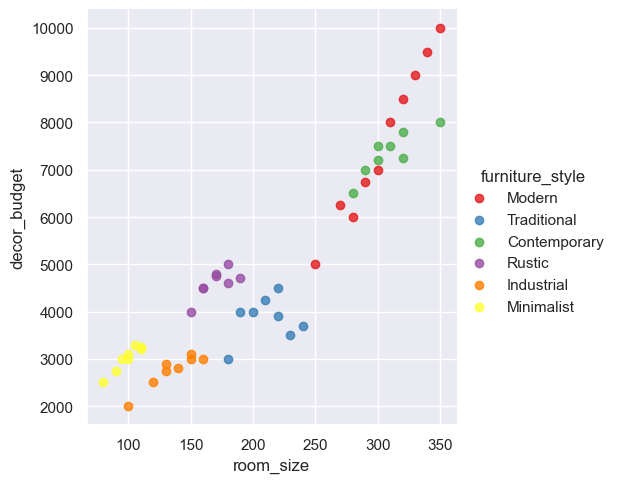

In [169]:
sns.lmplot(x='room_size', y= 'decor_budget', data = interior,
          fit_reg = False, hue = 'furniture_style',
           legend = True,palette= "Set1"
          )

<Axes: xlabel='radius_mean', ylabel='Density'>

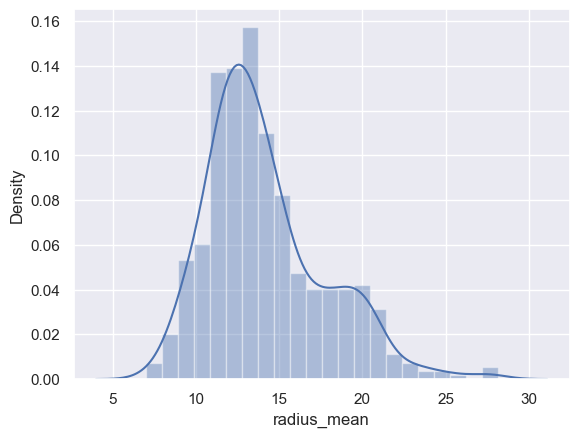

In [171]:
#Histogram with Seaborn
sns.distplot(cancer['radius_mean'])

<Axes: xlabel='radius_mean'>

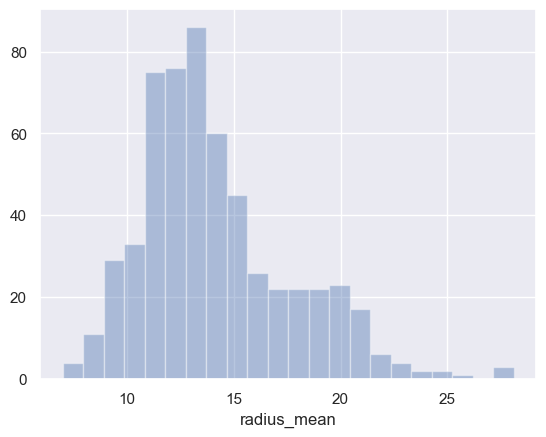

In [172]:
#Histogram with Seaborn
sns.distplot(cancer['radius_mean'],kde = False)

<Axes: xlabel='room_type', ylabel='count'>

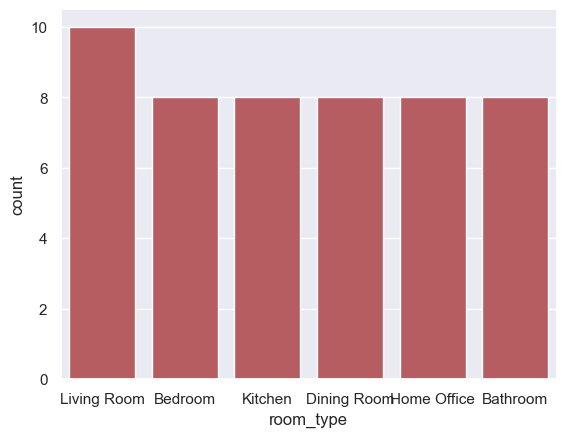

In [176]:
sns.countplot(x = "room_type", data = interior, color = 'r')

<Axes: xlabel='room_type', ylabel='count'>

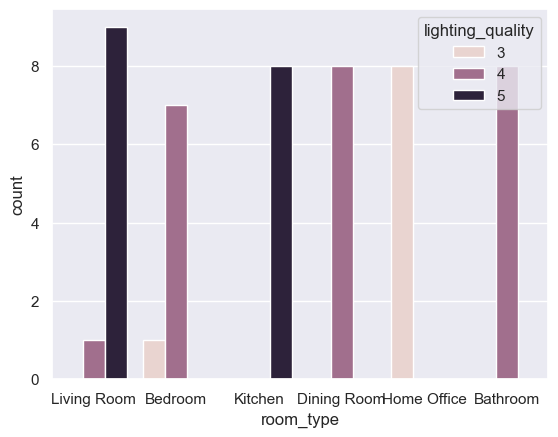

In [177]:
sns.countplot(x = "room_type", data = interior, hue = "lighting_quality")

In [179]:
census[census['STNAME'].str.endswith('ma')]

SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME            CTYNAME  \
0         40       3         6      1       0   Alabama            Alabama   
1         50       3         6      1       1   Alabama     Autauga County   
2         50       3         6      1       3   Alabama     Baldwin County   
3         50       3         6      1       5   Alabama     Barbour County   
4         50       3         6      1       7   Alabama        Bibb County   
...      ...     ...       ...    ...     ...       ...                ...   
2240      50       3         7     40     145  Oklahoma     Wagoner County   
2241      50       3         7     40     147  Oklahoma  Washington County   
2242      50       3         7     40     149  Oklahoma     Washita County   
2243      50       3         7     40     151  Oklahoma       Woods County   
2244      50       3         7     40     153  Oklahoma    Woodward County   

      CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  POPESTIMATE2011  \
0           4779736            4780127          4785161          4801108   
1             54571              54571            54660            55253   
2            182265             182265           183193           186659   
3             27457              27457            27341            27226   
4             22915              22919            22861            22733   
...             ...                ...              ...              ...   
2240          73085              73087            73413            74088   
2241          50976              50977            51064            51522   
2242          11629              11629            11610            11622   
2243           8878               8878             8895             8765   
2244          20081              20081            19977            20078   

      POPESTIMATE2012  POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  \
0             4816089          4830533          4846411          4858979   
1               55175            55038            55290            55347   
2              190396           195126           199713           203709   
3               27159            26973            26815            26489   
4               22642            22512            22549            22583   
...               ...              ...              ...              ...   
2240            75018            75680            75612            76559   
2241            51721            51569            51967            52021   
2242            11655            11738            11570            11661   
2243             8832             9000             9264             9304   
2244            20624            21184            21485            21559   

      NPOPCHG_2010  NPOPCHG_2011  NPOPCHG_2012  NPOPCHG_2013  NPOPCHG_2014  \
0             5034         15947         14981         14444         15878   
1               89           593           -78          -137           252   
2              928          3466          3737          4730          4587   
3             -116          -115           -67          -186          -158   
4              -58          -128           -91          -130            37   
...            ...           ...           ...           ...           ...   
2240           326           675           930           662           -68   
2241            87           458           199          -152           398   
2242           -19            12            33            83          -168   
2243            17          -130            67           168           264   
2244          -104           101           546           560           301   

      NPOPCHG_2015  BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
0            12568       14226       59689       59062       57938   
1               57         151         636         615         574   
2             3996         517        2187        2092        2160   
3             -326        

In [182]:
cancer.filter(like="_mean") #Subset all columns that ends with _mean

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  
0                   0.07871  
1                   0.05667  
2                   0.05999  
3                   0.09744  
4                   0.05883  
..                      ...  
564                 0.05623  
565                 0.05533  
566                 0.05648  
567                 0.07016  
568                 0.05884  

[569 rows x 10 columns]

<Axes: ylabel='radius_mean'>

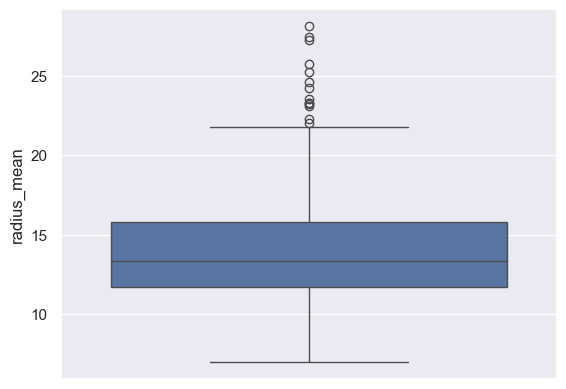

In [186]:
sns.boxplot(y = cancer['radius_mean'])

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

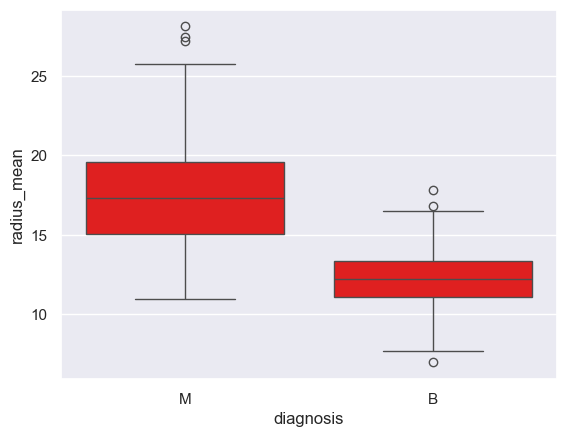

In [189]:
sns.boxplot(x= cancer['diagnosis'], y = cancer['radius_mean'], color = 'red')

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

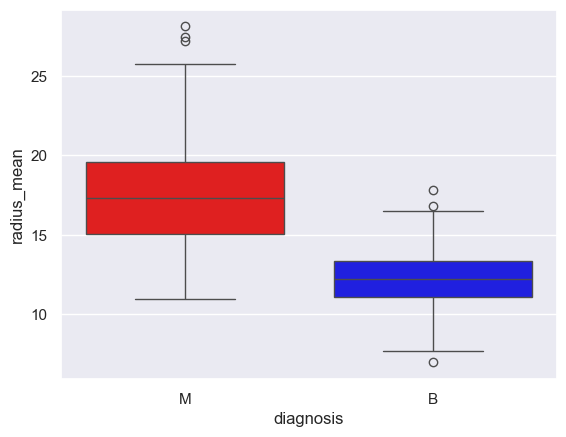

In [192]:
sns.boxplot(x= cancer['diagnosis'], y = cancer['radius_mean'], palette={'M': 'red', 'B': 'blue'})

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

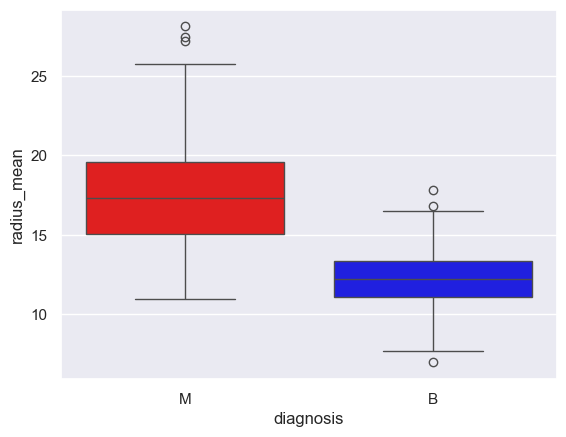

In [193]:
sns.boxplot(x= cancer['diagnosis'], y = cancer['radius_mean'], palette= ['red','blue'])

<Axes: xlabel='room_type', ylabel='room_size'>

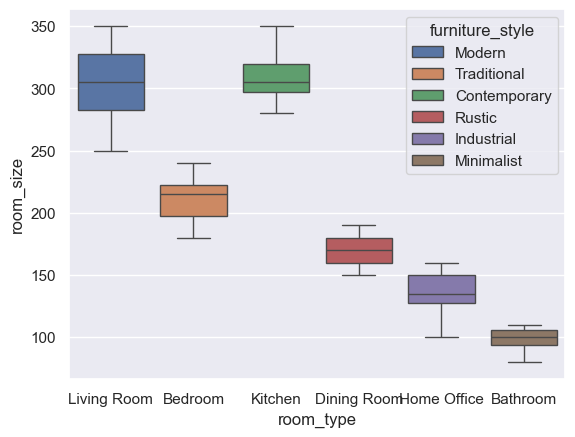

In [200]:
sns.boxplot(x = 'room_type',y = 'room_size', hue = 'furniture_style',data = interior)